<h1><center>Laboratorio 6: El Pandas no Muerde (act III) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudantes: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Michelle Avendaño
- Nombre de alumno 2: Claudia Navarro


### **Link de repositorio de GitHub:** `http://....`


## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [102]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [103]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [104]:
#df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = pd.read_pickle("/content/drive/MyDrive/online_retail_II.pickle")

df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


Un poco sobre la data:

In [105]:
print("Información sobre el dataset:")
print(df_retail.info())

print("Descripción estadística de las variables numéricas:")
print(df_retail.describe())


Información sobre el dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB
None
Descripción estadística de las variables numéricas:
            Quantity          Price
count  525461.000000  525461.000000
mean       10.337667       4.688834
std       107.424110     146.126914
min     -9600.000000  -53594.360000
25%         1.000000       1

Inicialmente, con el análisis hecho anteriormente es posible notar que hay que hacer una limpieza con la variable 'Price' debido a que hay valores negativos.

## 1.2 Análisis Explotatorio de los Datos [0.5 puntos]

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariable se enfoca en comprender el comportamiento individual de una sola variable, mientras que el análisis multivariable se concentra en el estudio de dos o más variables para detectar relaciones y patrones. Por otro lado, el análisis de datos faltantes implica examinar y manejar valores ausentes en el conjunto de datos, para evitar sesgos y mejorar la calidad de los resultados.

Estos análisis proporcionan insights sobre los datos, permiten tomar decisiones informadas, identificar correlaciones y patrones, y aseguran la integridad de los datos.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie.

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [106]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada

        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")

    else:
            count = (
                serie.value_counts()[0:100]
                .reset_index()
                .rename(columns = {serie.name: 'Count'})
            )
            fig = px.bar(
                x=count['index'].astype(str),
                y=count["Count"],
                title=f"100 Most common categories of {serie.name}",
            )

    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

#### Price

In [107]:
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

Esta variable es de tipo float y no contiene datos nulos, lo que implica que todas las 525,461 observaciones están completas y disponibles para su análisis.

En lo que respecta a la distribución de los datos, la media del precio es de aproximadamente 4.688, con una desviación estándar de alrededor de 146.129. Esto indica que los precios varían significativamente en relación con la media. Sin embargo, es importante destacar que se encuentran valores atípicos en el conjunto de datos, como el precio mínimo de -53,594.36. Dado que los precios normalmente deben ser valores positivos, estos valores negativos podrían ser errores en la captura de datos o registros inusuales que requieren una revisión más detenida. Además, se observa que hay 3 observaciones con valores negativos, lo que sugiere que estos casos deben ser tratados adecuadamente antes de cualquier análisis posterior. Del mismo modo, se identifican 3,687 observaciones con precios iguales a cero. Esto es inusual en el contexto de los precios, ya que generalmente implica que los productos se están vendiendo de forma gratuita, lo que podría ser una señal de datos erróneos o valores que requieren una validación adicional.

En cuanto a la forma de la distribución de los datos, se observa una kurtosis extremadamente alta con un valor de 64,868.345, lo que sugiere que la distribución tiene colas pesadas y una concentración significativa de datos en torno a la media. Además, la asimetría (skewness) es negativa, con un valor de -140.768, indicando una cola larga en el lado izquierdo de la distribución.

Con respecto a los outliers, e aconseja su exclusión debido a su gran distancia con respecto a la media, su baja presencia y el potencial impacto adverso que podrían tener en las futuras estimaciones.

#### Quantity

In [108]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Esta variable, de tipo int64, contiene 525,461 observaciones sin datos faltantes, lo que asegura que todo el conjunto de datos esté completo y disponible para su análisis.

En cuanto a la distribución de los datos, la media de la cantidad (quantity) es de aproximadamente 10.338, con una desviación estándar de alrededor de 107.424. Esto indica una variabilidad significativa en relación con la media. Es importante destacar que el valor mínimo es -9,600.0, lo cual es inusual para una cantidad, ya que normalmente debería ser un valor positivo. La presencia de valores negativos puede requerir una revisión detallada, ya que podría ser el resultado de errores de entrada o situaciones inusuales.

Además, se observa que hay 12,326 observaciones con valores negativos, lo que representa aproximadamente el 2.35% del total de observaciones. Aunque no se encuentran valores iguales a cero en esta variable, la presencia de valores negativos sugiere que estos casos deben ser tratados cuidadosamente en futuros análisis.

En términos de la forma de la distribución, se observa una kurtosis de 6,277.667, lo que indica colas pesadas y una concentración de datos alrededor de la media. La asimetría es positiva, con un valor de 36.045, lo que sugiere una cola larga en el lado derecho de la distribución.

En cuanto a la presencia de valores atípicos, la existencia de datos negativos (que no deberían estar presentes) puede distorsionar la precisión de los gráficos y análisis, lo que sugiere la necesidad de evaluar la situación sin tener en cuenta estos datos negativos. Por lo tanto, se recomienda analizar el conjunto de datos excluyendo los valores negativos, al igual que se aconseja la eliminación de los valores atípicos para una mejor representación de la distribución de la variable.

#### InvoiceDate

In [109]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

La fecha mediana de las boletas es el 27 de junio de 2010. El 25% de las fechas son anteriores al 21 de marzo de 2010, el 50% están antes del 6 de julio de 2010, y el 75% son previas al 15 de octubre de 2010.

Además, el período con el mayor número de facturas se encuentra entre el 7 de noviembre y el 20 de noviembre de 2010, con un total de 69 facturas en ese rango de fechas. Por otro lado, el período con la menor cantidad de facturas corresponde al intervalo entre el 20 de diciembre de 2009 y el 2 de enero de 2010.

#### Invoice


In [110]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

Esta variable se encuentra en formato de categoría. En este conjunto de datos, se identifican un total de 28816 categorías únicas. La categoría más frecuente es la "537434", que se registra en un total de 675 ocasiones, lo que indica que este tipo de factura es el más común entre todas las categorías observadas, se podría inferir que esta factura tiene 675 compras.

#### StockCode

In [111]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

Esta variable contiene códigos que representan diversos productos, y en el inventario se identifican un total de 4632 productos únicos. El código de producto más común es "85123A", el cual se adquiere con mayor frecuencia y registra una frecuencia de compra de 3516 veces.
A medida que avanzamos hacia otros productos en el gráfico, la frecuencia de compra tiende a disminuir gradualmente, llegando a un punto donde la frecuencia de compra es bastante similar entre la mayoría de los productos en el inventario.

#### Customer ID

In [112]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

Esta variable se refiere a un conjunto de datos relacionado con identificaciones de clientes. Estos datos están representados como categorías  y contienen un total de 417534 observaciones, es importante señalar que el conjunto de datos presenta un número significativo de datos faltantes, con un total de 107927 celdas sin información, lo que representa aproximadamente el 20.54% de los registros. Cabe destacar que es la única variable con datos faltantes, sin embargo, al tratarse del ID de los clientes, esta puede que no sea una variable muy importante y se puede eliminar.

Dentro de estas identificaciones, se identifican 4383 únicas, siendo "14911.0" la identificación más frecuente con un total de 5710 apariciones. Lo que se puede analizar como que este cliente ha hecho muchas compras.

#### Description

In [113]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

Esta variable se relaciona con las descripciones de productos y muestra la existencia de 4,682 descripciones únicas. Es importante destacar que esta cifra difiere ligeramente de la cantidad de códigos de productos únicos, que se esperaría que fuera 4,632, ya que cada código de producto generalmente corresponde a una descripción única. Entre todas las descripciones, la más frecuente es "WHITE HANGING HEART T-LIGHT HOLDER," la cual aparece con una frecuencia de 3,549 veces, indicando que este artículo en particular es el más común.

#### Country

In [114]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

La base de datos incluye información de 40 países distintos. No obstante, es evidente que el país que lidera en términos de compras es el Reino Unido, con un total de 485852 compras registradas. En contraste, otros países como Irlanda y Alemania muestran cifras significativamente más bajas, con un total de 9679 y 8129 compras, respectivamente. Estas cifras son notablemente inferiores en comparación con las compras realizadas en el Reino Unido, lo que destaca la diferencia en el volumen de compras entre estos países.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes. Ejecute la función `profile_df` y comente sus resultados.

In [115]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)


    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i])
            plt.ylabel(list_type[j])
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

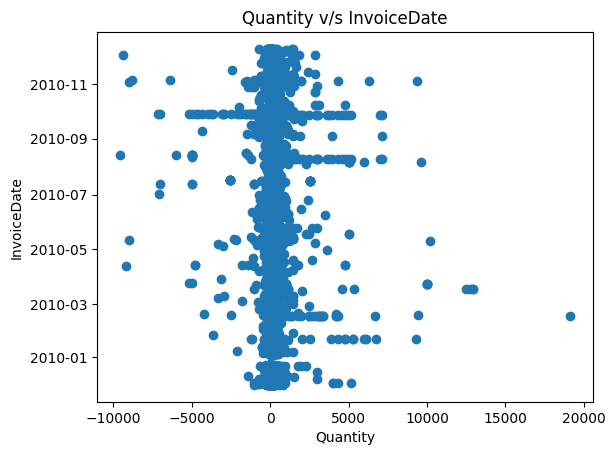

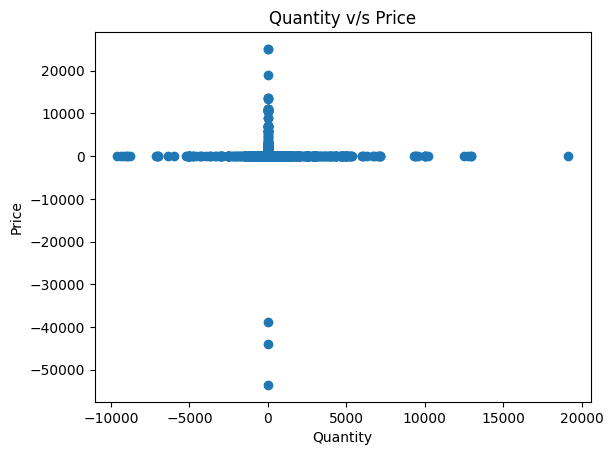

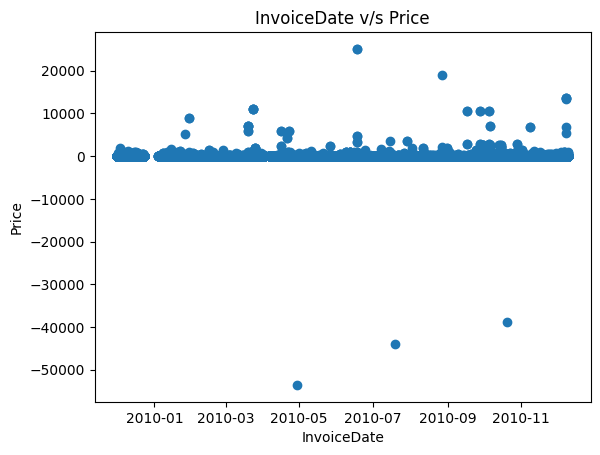

## Correlation:

<ipython-input-115-5c317ab18072>:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

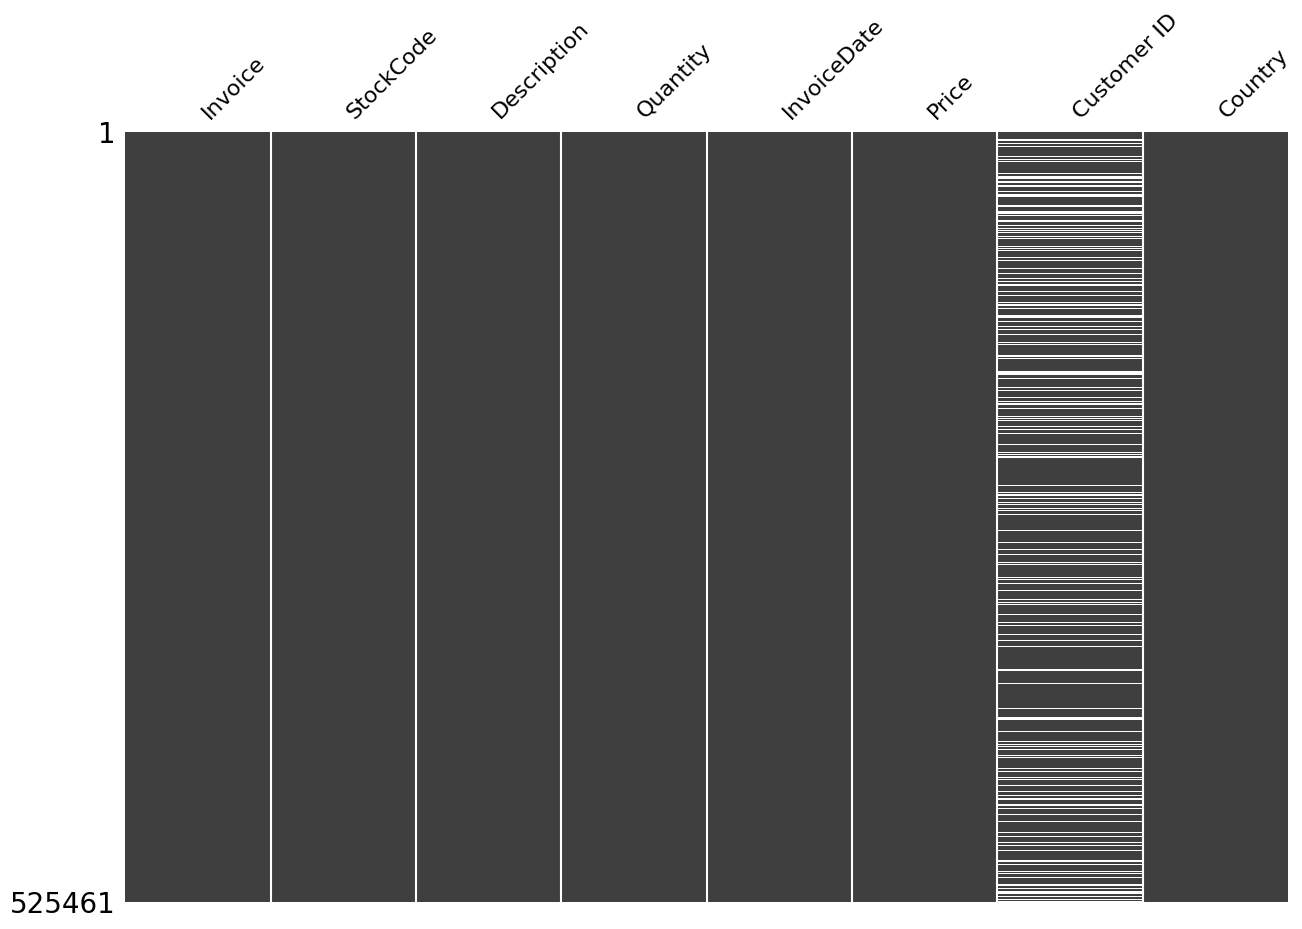

In [116]:
profile_df(df_retail)

*Gráfico Quantity v/s InvoiceDate* :  Se aprecia una tendencia de compras en todos los meses, pero se destaca una mayor frecuencia de compras en los meses de octubre y agosto. Además, es importante mencionar la presencia de valores atípicos, como los datos negativos discutidos previamente, así como puntos que podrían considerarse como valores atípicos, como aquel que se ubica aproximadamente en 2000.

*Gráfico Quantity v/s Price*: Se nota que la mayoría de los productos se concentran en un rango cercano a cero en cuanto a sus precios, es decir, los precios son bajos y/o hay productos que tienen un valor 0 lo que sería atípico. Además, se identifican tres productos con valores de precio negativos (justamente como se comento en el análisis univariable).

*Gráfico InvoiceDate v/s Price*: la mayoría de las compras se sitúan en un rango cercano a los 0 y los 2000 aproximadamente. Sin embargo, se destacan meses como febrero, abril, octubre, noviembre y diciembre, en los cuales se observa un incremento significativo en las compras que superan ampliamente este rango. Además, se identifica un punto atípico en junio donde el precio alcanza los 2000. Notablemente, en este gráfico se aprecian varios valores atípicos que se encuentran por encima del precio de 5000.

*Gráfico de correlación*: Se nota que la cantidad (quantity) y el precio (price) muestran una correlación muy baja. Esta falta de correlación también se refleja en el gráfico de dispersión que se visualizó anteriormente, donde se aprecia claramente una línea horizontal que separa las variables sin una relación evidente entre ellas.

*Missing Matrix*: La única variable que presenta valores faltantes es 'Customer ID', como se mencionó previamente.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que genere una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

Se eliminan del dataframe todas las filas en las que se encuentren Costumer ID nulos, ya que este identificador no tiene mayor relevancia en el análisis de los datos. Además, es probable que estos valores nulos se deban a errores de registro, ya que no deberían existir compras sin estar asociadas a algún cliente.

Posteriormente, se procede a eliminar las filas que contienen cantidades negativas, dado que esto no debería ocurrir en un contexto de ventas. Del mismo modo, se eliminan los registros con precios negativos y aquellos con precio igual a cero, ya que estas situaciones sugieren que los productos se están regalando o se está pagando a los usuarios para que los adquieran, lo cual no es consistente con un análisis de ventas realistas.

Finalmente, se excluyen del análisis los países que presenten una frecuencia de ventas menor a 2000, ya que estos países no contribuyen significativamente a la muestra de datos y podrían introducir sesgos en el análisis.

In [117]:
def limpiar(df):
    # Elimina las filas con valores nulos en ID
    df = df.dropna(subset=['Customer ID'])
    # Excluir filas en que Quantity es negativo
    df = df[df['Quantity'] >= 0]
    # Excluir filas en que Price es negativo o cero o tiene valores mayores a 5000
    df = df[(df['Price'] > 0) & (df['Price'] <= 5000)]
    # Contar la frecuencia de cada país
    country_counts = df['Country'].value_counts()
    # Filtrar las filas donde la frecuencia del país sea mayor o igual a 2000
    df = df[df['Country'].isin(country_counts[country_counts >= 2000].index)]
    return df

df_retail = limpiar(df_retail)
df_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


### 1.2.3.1 Analisis univariado

#### Price

In [118]:
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations         395286.0
Mean                           3.146776
Std                           13.714178
Min                               0.001
25%                                1.25
50%                                1.95
75%                                3.75
Max                              3610.5
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       29897.615558
Skew                           150.4092
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   395126
Duplicate rows (%)              99.96 %
Total size in memory      6324576 bytes
dtype: object

Esta variable inicialmente tenía 525,461 observaciones. Mediante la limpieza se eliminaron los valores menores e iguales a 0 y los superiores a 5000, dando un total de 395286 observaciones.

En lo que respecta a la distribución de los datos, la media del precio es de aproximadamente 3.14677, con una desviación estándar de alrededor de 13.7141. Esto indica que los precios varían menos en relación con la media que con el caso inicial. Además, ya no se tiene la presencia de los valores atípicos, como el precio mínimos negativos o cero.

En cuanto a la forma de la distribución de los datos, se observa una kurtosis con un valor, 29897.61, aproximadamente la mitad respecto al valor inicial, aun así la distribución mantiene las colas pesadas y una concentración significativa de datos en torno a la media. Además, la asimetría (skewness) es ahora es positiva, con un valor de 150.40, indicando una cola larga en el lado derecho de la distribución.

#### Quantity

In [119]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         395286.0
Mean                          12.862935
Std                           72.326248
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                             10000.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6831.072562
Skew                          67.148908
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   395193
Duplicate rows (%)              99.98 %
Total size in memory      6324576 bytes
dtype: object

Esta variable inicialmente tenía 525,461 observaciones. Mediante la limpieza se eliminaron los valores menores a 0, dando un total de 395286 observaciones.

En lo que respecta a la distribución de los datos, la media de la cantidad es de aproximadamente 12.8629, con una desviación estándar de alrededor de 72.3262. Esto indica que las cantidades varían menos en relación con la media que con el caso inicial.

En cuanto a la forma de la distribución de los datos, se observa una kurtosis con un valor 6831.0725, menor que el valor inicial, aun así la distribución mantiene las colas pesadas y una concentración significativa de datos en torno a la media. Además, la asimetría tiene un valor de 67.1489, indicando una cola larga en el lado derecho de la distribución.

#### InvoiceDate

In [120]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           395286
Mean                      2010-07-01 00:51:06.282540032
Min                                 2009-12-01 07:45:00
25%                                 2010-03-26 11:21:00
50%                                 2010-07-08 17:02:00
75%                                 2010-10-14 16:44:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   393886
Duplicate rows (%)                              99.65 %
Total size in memory                      6324576 bytes
dtype: object

La fecha mediana de las boletas es el 1 de julio de 2010, "más reciente" que el caso inicial.

Además, se mantiene el período con el mayor número de facturas entre el 7 de noviembre y el 20 de noviembre de 2010. De igual forma, se mantiene el período con la menor cantidad de facturas entre el 20 de diciembre de 2009 y el 2 de enero de 2010.

#### Invoice

In [121]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           395286
Unique                            18643
Top                              500356
Freq                                270
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   393638
Duplicate rows (%)              99.58 %
Total size in memory      5240196 bytes
dtype: object

Esta variable se encuentra en formato de categoría. En este conjunto de datos, se identifican un total de 18643 categorías únicas, lo que indica que al limpiar la data se eliminaron un aproximado de 9000. La nueva categoría más frecuente es la "500356", que se registra en un total de 270 ocasiones.

#### StockCode

In [122]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           395286
Unique                             4011
Top                              85123A
Freq                               3114
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   395122
Duplicate rows (%)              99.96 %
Total size in memory      4122052 bytes
dtype: object

Esta variable contiene códigos que representan diversos productos, y en el inventario se identifican un total de 4011 productos únicos, lo que indica que al limpiar la data se eliminaron un aproximado de 600 productos. El código de producto más común se mantiene en "85123A", con una frecuencia de 3114. A medida que avanzamos hacia otros productos en el gráfico, la frecuencia de compra tiende a disminuir gradualmente, llegando a un punto donde la frecuencia de compra es bastante similar entre la mayoría de los productos en el inventario.

#### Customer ID

In [123]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         395286.0
Unique                           4108.0
Top                             14911.0
Freq                             5570.0
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   395203
Duplicate rows (%)              99.98 %
Total size in memory      4120060 bytes
dtype: object

Esta variable se refiere a un conjunto de datos relacionado con identificaciones de clientes. Estos datos están representados como categorías y contienen un total de 395286 observaciones, aproximadamente 10000 menos que el caso inicial. Debido a que se eliminaron los datos faltantes.

Dentro de estas identificaciones, se identifican 4108 únicas (200 menos que el caso inicial). Además, se mantiene "14911.0" como la identificación más frecuente.

#### Description

In [124]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                395286
Unique                                                  4438
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3114
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        395072
Duplicate rows (%)                                   99.95 %
Total size in memory                           6324576 bytes
dtype: object

Esta variable se relaciona con las descripciones de productos y muestra la existencia de 4438 descripciones únicas, aproximadamente 400 menos que el caso inicial. Entre todas las descripciones, la más frecuente es "WHITE HANGING HEART T-LIGHT HOLDER," la cual aparece con una frecuencia de 3114 veces, indicando que este artículo en particular es el más común.



#### Country

In [125]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            395286
Unique                                 5
Top                       United Kingdom
Freq                              370926
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    395286
Duplicate rows (%)               100.0 %
Total size in memory       6324576 bytes
dtype: object

Se eliminaron los países con una frecuencia menor a 2000 compras, dejando solo 5 países en el dataframe. No obstante, se mantiene que el país que lidera en términos de compras es el Reino Unido, con un total de 370926 compras registradas. En contraste, otros países como Irlanda y Alemania muestran cifras significativamente más bajas, con un total de 8507 y 7654 compras, respectivamente. Estas cifras son notablemente inferiores en comparación con las compras realizadas en el Reino Unido, lo que destaca la diferencia en el volumen de compras entre estos países.

### 1.2.3.2 Analisis multivariado

## Bivariant Analysis:

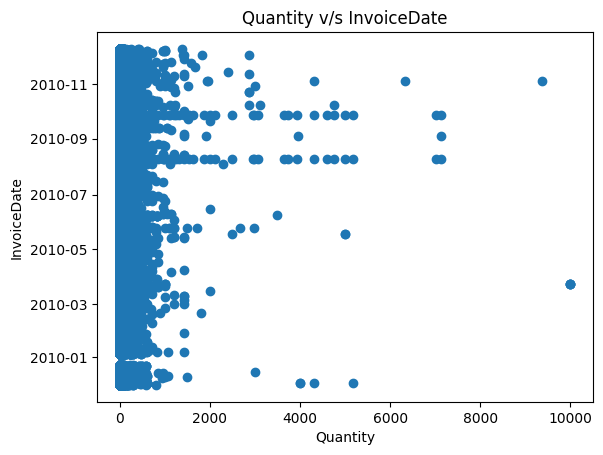

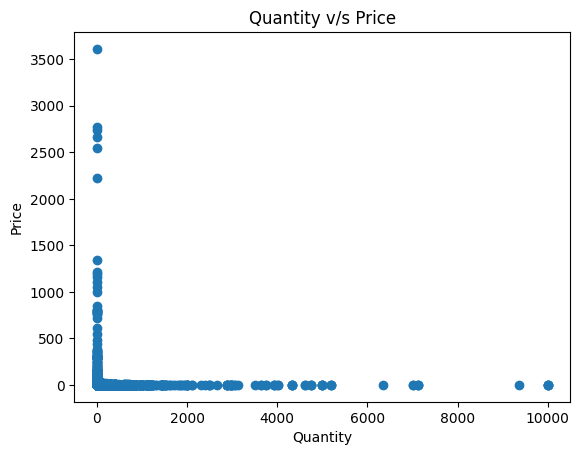

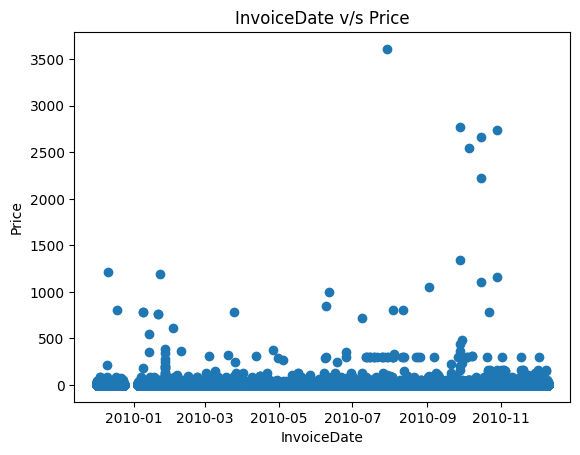

## Correlation:

<ipython-input-115-5c317ab18072>:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

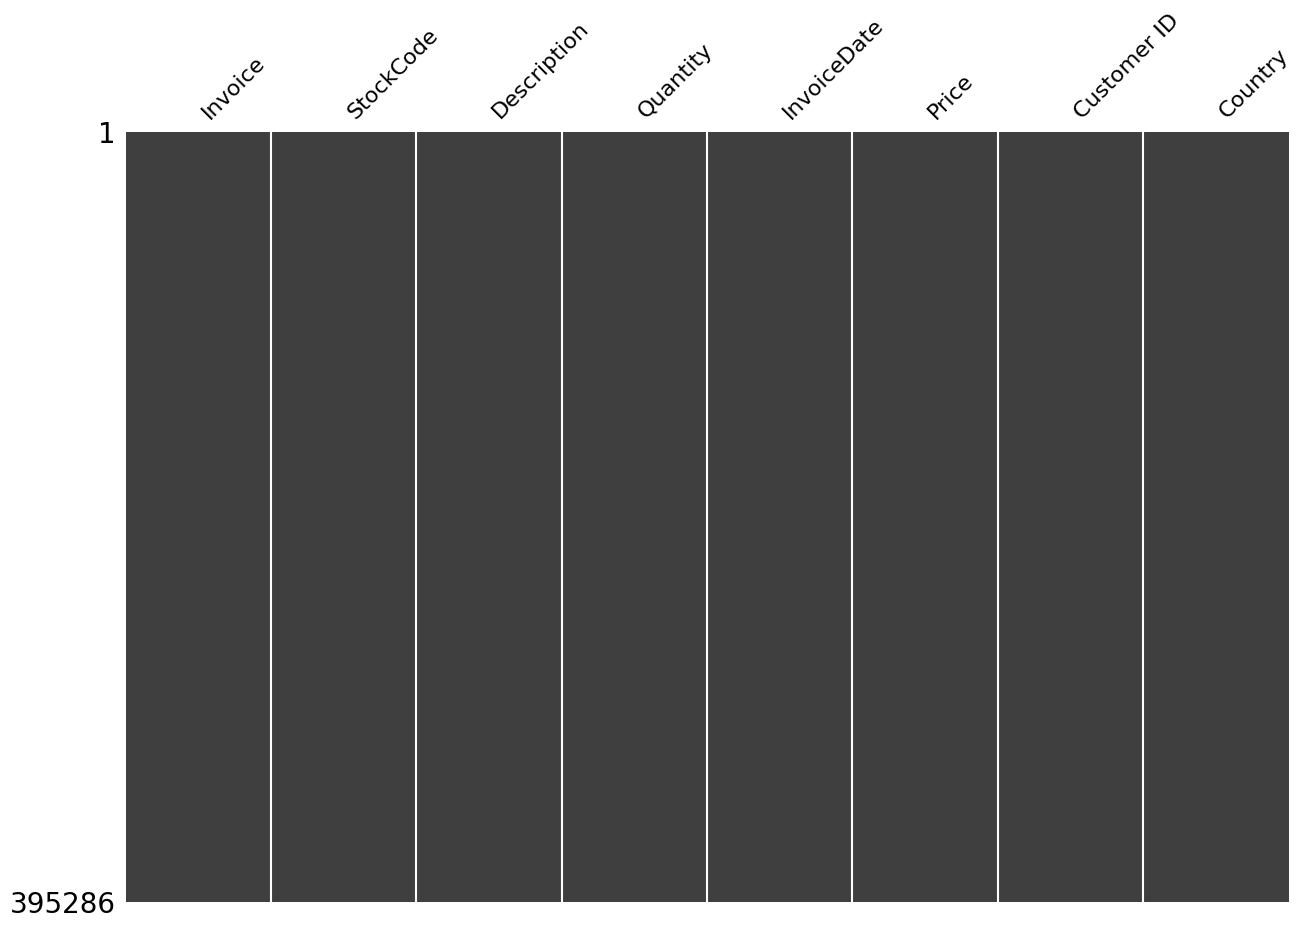

In [126]:
profile_df(df_retail)

Gráfico Quantity v/s InvoiceDate : Se aprecia una tendencia de compras en todos los meses, pero se destaca una mayor frecuencia de compras en los meses de octubre y agosto. Además, es importante mencionar que el gráfico se desplazó hacia la izquierda, debido a que se eliminaron las cantidades inferiores a 0.

Gráfico Quantity v/s Price: Se nota que la mayoría de los productos se concentran en un rango cercano a cero en cuanto a sus precios, aún después de eliminar los precios iguales a cero y negativos.

Gráfico InvoiceDate v/s Price: la mayoría de las compras se sitúan en un rango cercano a los 0 y los 500 aproximadamente. Además, no se percibe ningún comportamiento inusual a lo largo de los meses, solo que posterior a septiembre se compran un par de artículos con un mayor valor.

Gráfico de correlación: Se nota que la cantidad (quantity) y el precio (price) mantienen una correlación muy baja.

Missing Matrix: Ya no se presencian valores faltantes

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [134]:
#Calcular las ganancias totales por producto
df_productos = df_retail.groupby('Description')['Price'].sum().reset_index()

#Ordenar los productos por ganancias totales en orden descendente
df_productos = df_productos.sort_values(by='Price', ascending=False)

#Seleccionar los 30 productos principales
top_30_productos = df_productos.head(30)

#Crear el gráfico de barras con Plotly
fig = px.bar(top_30_productos, x='Description', y='Price', title='Top 30 Productos por Ganancias')
fig.update_xaxes(title_text='Producto')
fig.update_yaxes(title_text='Ganancias')
fig.show()


### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [130]:
def plot_ventas(dataframe):
    pass

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>